## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

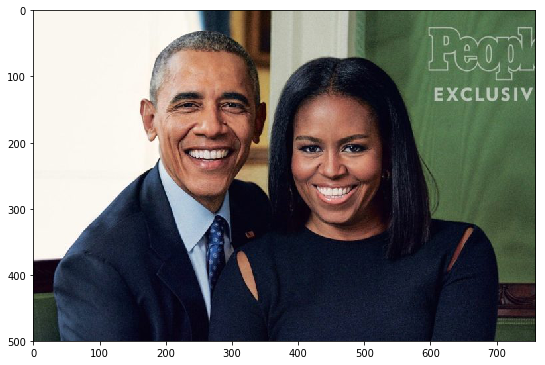

In [4]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


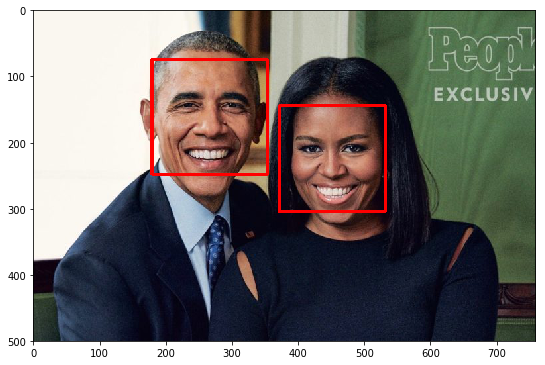

In [5]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [24]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_2.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12800, out_features=1000, bias=True)
  (fc1_drop): Dropout(p=0.4)
  (fc2): Linear(in_features=1000, out_features=136, bias=True)
)

In [25]:
for i in net.parameters():
    print(i)

Parameter containing:
tensor([[[[-0.0930, -0.0818,  0.0385, -0.0011,  0.1120],
          [-0.0538,  0.0301, -0.0587,  0.1813,  0.0010],
          [-0.0629, -0.0935,  0.0540, -0.0359,  0.0807],
          [-0.0205,  0.1791, -0.1277,  0.1118,  0.0573],
          [ 0.0873, -0.0443,  0.0211, -0.0587,  0.0519]]],


        [[[-0.0518, -0.0753,  0.1507, -0.0295, -0.0877],
          [-0.0373, -0.0197,  0.0600,  0.0116,  0.1222],
          [-0.0300,  0.1854, -0.1170, -0.1253,  0.1509],
          [-0.0451, -0.0665,  0.1207, -0.1323, -0.1822],
          [-0.1731,  0.1682, -0.1199,  0.1164,  0.0608]]],


        [[[-0.0275,  0.0745, -0.0787, -0.1926, -0.0794],
          [-0.0189, -0.1806, -0.0746, -0.1379, -0.1056],
          [-0.1684, -0.1757, -0.0282, -0.0482,  0.1743],
          [-0.1053, -0.1702,  0.0906,  0.0142, -0.0948],
          [-0.1450,  0.1017, -0.1914, -0.0027, -0.1063]]],


        [[[-0.1208,  0.1888, -0.1354, -0.0960,  0.1274],
          [ 0.0996, -0.0996,  0.0749, -0.0880,  0.1323

Parameter containing:
tensor([[ 8.1294e-03,  2.2271e-03,  9.8971e-03,  ...,  1.1538e-02,
          3.0987e-03,  6.6156e-03],
        [-4.9903e-03, -9.9471e-03,  4.5709e-03,  ...,  6.4848e-03,
          6.9254e-03,  1.0527e-02],
        [ 2.2001e-03,  5.2216e-03, -9.6009e-03,  ...,  1.2536e-02,
         -1.4090e-03,  5.6534e-03],
        ...,
        [-4.1098e-03, -1.0776e-02, -5.5068e-03,  ..., -1.3383e-03,
         -3.4300e-04,  6.1148e-03],
        [-6.2522e-03, -4.8230e-03, -3.4437e-03,  ...,  9.0748e-03,
          1.4155e-02, -1.9909e-03],
        [ 5.2792e-03, -2.9922e-03, -8.2219e-03,  ..., -6.3211e-03,
          7.9176e-03,  7.0587e-03]])
Parameter containing:
tensor([ 4.6424e+00, -3.2863e-03,  1.7933e+02, -1.3947e-02, -4.3647e-03,
         2.5345e-04,  3.2984e+02, -1.0471e-02, -1.8053e-03,  1.0065e-02,
        -3.0646e-03, -5.3395e-03, -7.9666e-04, -9.2241e-03, -1.4568e-02,
        -1.3502e-02, -4.6967e-03, -4.0062e+01, -4.3984e-03, -9.0118e-03,
        -1.1822e+02,  3.7496e-03

In [26]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.0930, -0.0818,  0.0385, -0.0011,  0.1120],
                        [-0.0538,  0.0301, -0.0587,  0.1813,  0.0010],
                        [-0.0629, -0.0935,  0.0540, -0.0359,  0.0807],
                        [-0.0205,  0.1791, -0.1277,  0.1118,  0.0573],
                        [ 0.0873, -0.0443,  0.0211, -0.0587,  0.0519]]],
              
              
                      [[[-0.0518, -0.0753,  0.1507, -0.0295, -0.0877],
                        [-0.0373, -0.0197,  0.0600,  0.0116,  0.1222],
                        [-0.0300,  0.1854, -0.1170, -0.1253,  0.1509],
                        [-0.0451, -0.0665,  0.1207, -0.1323, -0.1822],
                        [-0.1731,  0.1682, -0.1199,  0.1164,  0.0608]]],
              
              
                      [[[-0.0275,  0.0745, -0.0787, -0.1926, -0.0794],
                        [-0.0189, -0.1806, -0.0746, -0.1379, -0.1056],
                        [-0.1684, -0.1757, -0.0282, -0

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

**Hint**: The sizes of faces detected by a Haar detector and the faces your network has been trained on are of different sizes. If you find that your model is generating keypoints that are too small for a given face, try adding some padding to the detected `roi` before giving it as input to your model.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




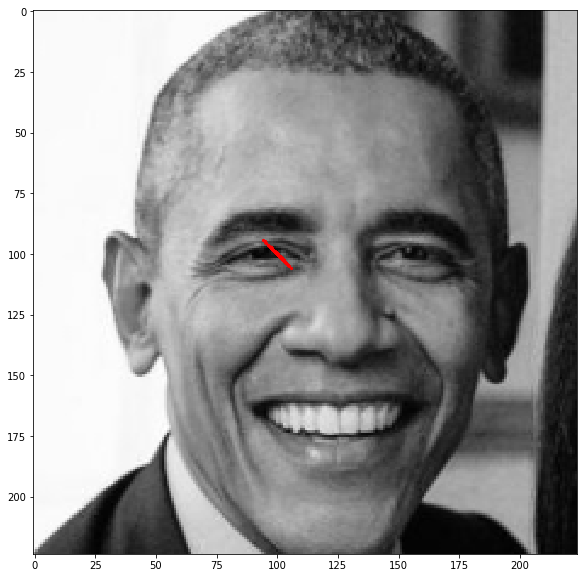

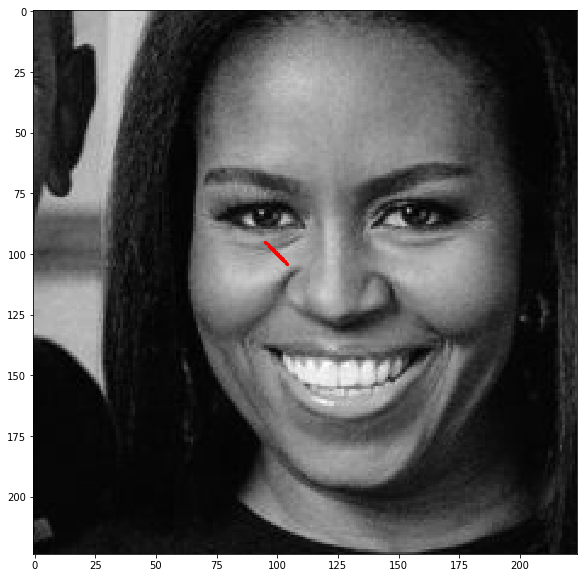

In [30]:
image_copy = np.copy(image)
from data_load import Rescale, RandomCrop, Normalize, ToTensor
from torchvision import transforms, utils
from models import Net
net=Net()
# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    plt.figure(figsize=(20,10))
    # Select the region of interest that is the face in the image 
    margin=0.3
    roi = image_copy[y-int(margin*h):y+h+int(margin*h), x-int(margin*w):x+w+int(margin*w)]
    
    ## TODO: Convert the face region from RGB to grayscale
    #roi_BGR=cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
    roi_gray=cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
    #print(roi_gray.shape)
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    img = roi_gray
    
    h, w = img.shape[:2]
    if isinstance(256, int):
        if h > w:
            new_h, new_w = 256 * h / w, 256
        else:
            new_h, new_w = 256, 256 * w / h
    else:
         new_h, new_w = (256,256)

    new_h, new_w = int(new_h), int(new_w)

    img = cv2.resize(img, (new_w, new_h))
    
    h, w = img.shape[:2]
    new_h, new_w = (224,224)

    top = np.random.randint(0, h - new_h)
    left = np.random.randint(0, w - new_w)
    
    img = img[top: top + new_h,
                      left: left + new_w]
    img_copy=img
    #roi_std=data_transform[roi_gray]
    img=img/255.0
    
    if(len(img.shape)==2):
        img=img.reshape(img.shape[0],img.shape[1],1)
    
    img = img.transpose((2, 0, 1))
    shape=img.shape
    img=torch.from_numpy(img)
    
    img=img.reshape(1,shape[0],shape[1],shape[2])
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    #roi_std.transpose(2,0,1)    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    
    img=img.type(torch.FloatTensor)
    
    ############
    output_pts=net(img)
    ############
    output_pts = output_pts.view( 68, -1)
    
    output_pts=output_pts.detach().numpy()
    output_pts=output_pts*50+100
    plt.scatter(output_pts, output_pts, s=20, marker='.', c='r')
    ## TODO: Display each detected face and the corresponding keypoints        
    plt.imshow(img_copy,cmap='gray')    
    plt.show()
    

In [31]:
    ############
    output_pts=net(img)
    ############
    output_pts = output_pts.view( 68, -1)
    
    output_pts=output_pts.detach().numpy()
    
#     plt.scatter(output_pts[:, 0]*50.0+100, output_pts[:, 1]*50.0+100, s=20, marker='.', c='r')
#     ## TODO: Display each detected face and the corresponding keypoints        
#     plt.imshow(roi_gray,cmap='gray')    
#     plt.show()
    output_pts = output_pts*50+100
    

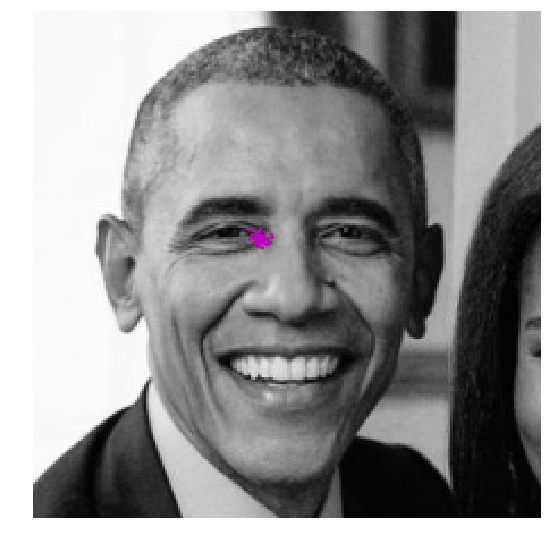

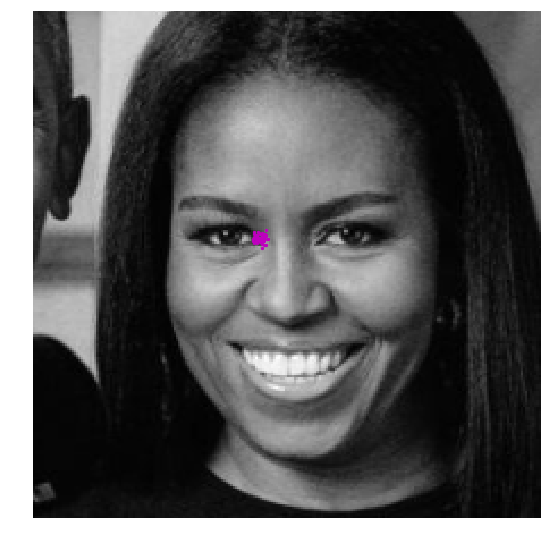

In [35]:
# loop over the detected faces from your haar cascade
i = 0
for (x,y,w,h) in faces:
    
    plt.figure(figsize=(20,10))
    ax = plt.subplot(1, len(faces), i+1)
    i += 1
    
    # Select the region of interest which is the face in the image
    margin = 0.3      
    roi = image_copy[y-int(margin*h):y+h+int(margin*h), x-int(margin*w):x+w+int(margin*w)]
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi =  roi/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    output_size = 224
    
    new_h, new_w = output_size, output_size

    roi = cv2.resize(roi, (new_w, new_h))
    
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    # add that third color dim
    roi_reshaped = roi.reshape(roi.shape[0], roi.shape[1], 1)
            
    # swap color axis because
    # numpy image: H x W x C
    # torch image: C X H X W
    
    roi_transpose = roi_reshaped.transpose((2, 0, 1))
    
    roi_transpose = roi_transpose.reshape(1, roi_transpose.shape[0], roi_transpose.shape[1], roi_transpose.shape[2])
    roi_tensor = torch.from_numpy(roi_transpose)
    
    dtype = torch.FloatTensor
    
    # convert images to FloatTensors
    roi_tensor = roi_tensor.type(dtype)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    predicted_key_pts = net(roi_tensor) 
    
    # reshape to batch_size x 68 x 2 pts
    predicted_key_pts = predicted_key_pts.view(68, -1)
    
    predicted_key_pts = predicted_key_pts.data
    predicted_key_pts = predicted_key_pts.numpy()
    
    # undo normalization of keypoints  
    predicted_key_pts = predicted_key_pts*50.0+100

    ## TODO: Display each detected face and the corresponding keypoints
    # image is grayscale
    plt.imshow(roi, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plt.axis('off')
    
plt.show()
   